In [996]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Publisher background:
- Name: Marwan Alhindi
- Started On: Sun 22 Jun 2023
- Finished On: Wed 25 Jun 2023
- This is my first machine learning project!
- Reason of doing this project/competition: Applying the knowledge learned from these books: The Complete Idiot's Guide To Statistics by Jr Ph D Robert a Donnelly, Python For Data Science Handbook by Jacob T. VanderPlas and Hands-on Machine Learing with Scikit-Learn, Keras & TensorFlow by Aurelien Geron.
- Approach taken: I follow the Machine Learning Project Checklist (Appendix B) from Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow.

# Frame the Problem and Look at the Big Picture

## Defining the objective in business terms:
- None. The objective is to predict which passangers survived the Titanic shipwreck.

## How will my solutions be used:
- None.

## What are the current solutions if any?
- None.

## How should you frame this problem with machine learning terminology?
- Supervised learning. Prediction/regression to be specific.
- Batch/offline since the datasets are not updated.
- Predicting by a model rather than instances.

## How should performance be measured?
- Using one of the performance measurement tools for regression such as RMSE or MAE.

## Is the performance measure alligned with the business objective?
- The performance measurement allign with the objective of the problem.

## What would be the minimum performance needed to reach the business objective?
- I am aiming for > 70% accuarcy.

## What are comparable problems?
- A similar problem is predicting the median house value based on given attributes such as the area and the number of rooms. This problem was predicted in the book Hands-on Machine Learning by Aurelien Geron.

## Is human expertise available?
https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook
https://www.kaggle.com/c/titanic/discussion

## How would you solve the problem manually?
- Not possible.

## List the assumptions you (or others) have made so far?
- None.

## Verify assumptions if possible.
- None

# Get the Data

## How much data do I need?
- The titanic dataset is small. We can use the entire dataset.

## Data source:
https://www.kaggle.com/c/titanic/data?select=train.csv

## How much space it will take?
- The dataset in total is approximately 92 kB.

## Data background:
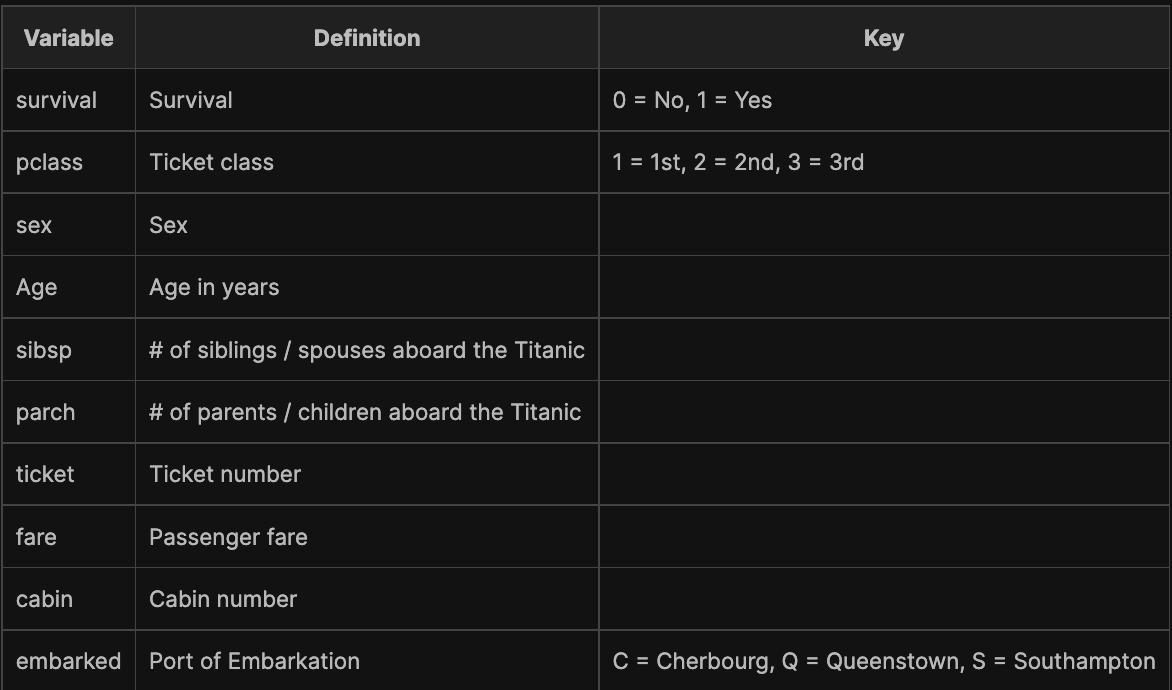
## Variable notes:
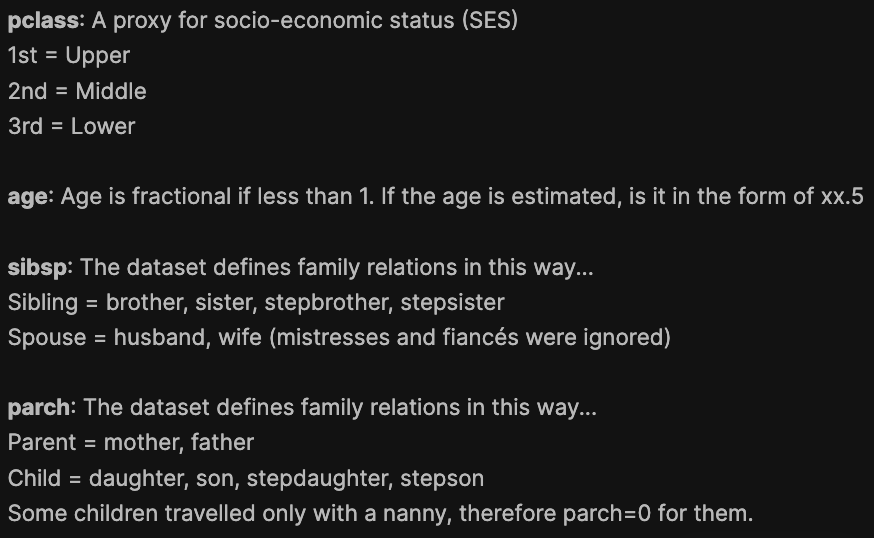

In [997]:
# Reading
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# Exploring the data

Traget attribute for supervised model: survival 

In [998]:
# Head train
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [999]:
# nulls and type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1000]:
# checking categorical attributes
print("Each class:")
print(df_train['Pclass'].value_counts())
print("Each Embarked:")
print(df_train['Embarked'].value_counts())
print("Each Sex:")
print(df_train['Sex'].value_counts())

Each class:
3    491
1    216
2    184
Name: Pclass, dtype: int64
Each Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Each Sex:
male      577
female    314
Name: Sex, dtype: int64


In [1001]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


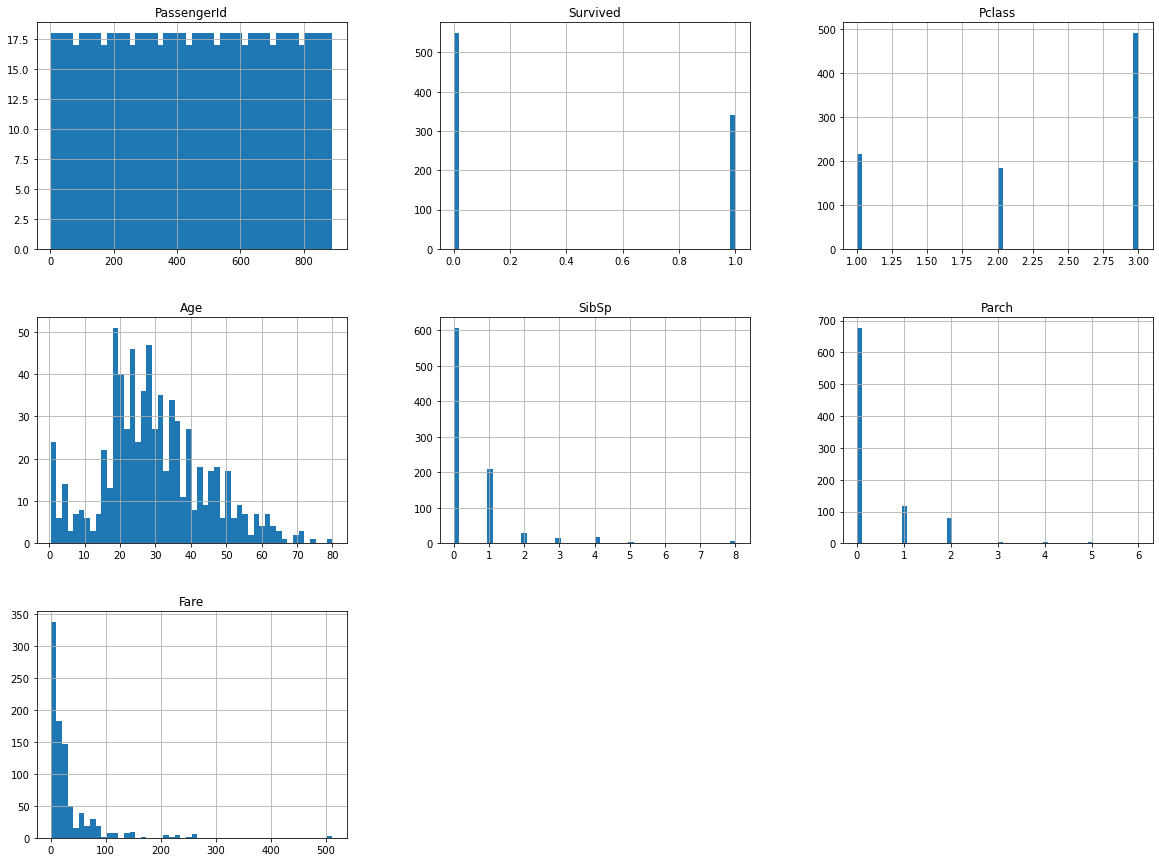

In [1002]:
df_train.hist(bins =50 , figsize = (20,15))
plt.show()

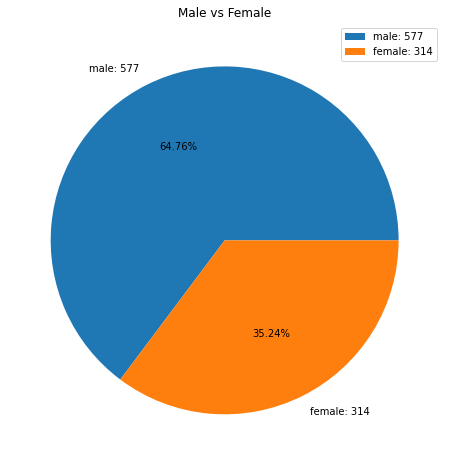

In [1003]:
female = df_train['Sex'].value_counts()[1]
male = df_train['Sex'].value_counts()[0]
plt.figure(figsize=(8, 8))
plt.pie([male, female],labels=['male: '+str(male), 'female: '+str(female)], autopct="%.2f%%")
plt.title("Male vs Female")
plt.legend()
plt.show()

In [1004]:
# Head test
df_test.head()        

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1005]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1006]:
# Size, shape and dimension
print(f"df_train shape:{df_train.shape}")
print(f"df_train cells:{df_train.size}")
print(f"df_test shape:{df_test.shape}")
print(f"df_test rows:{df_test.size}")

df_train shape:(891, 12)
df_train cells:10692
df_test shape:(418, 11)
df_test rows:4598


## Attributes correlation

In [1007]:
corr_matrix = df_train.corr()

corr_matrix['Survived']

# It seems like there's a linear correlation between survival with fare and Pclass. 

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>]], dtype=object)

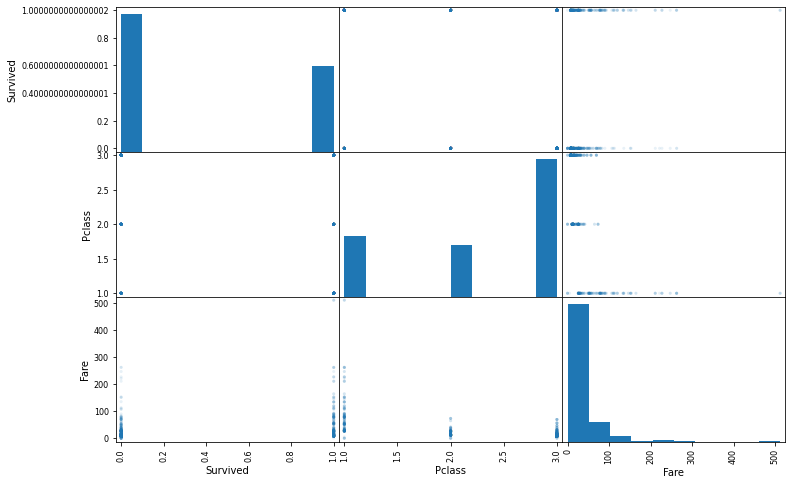

In [1008]:
attributes = ['Survived','Pclass','Fare']
scatter_matrix(df_train[attributes], figsize= (12,8), alpha=0.1)

# Preparing Data

## Cleaing df_train

In [1009]:
# Copy for data exploration
df_train_copy = df_train.copy()

### Missing values

In [1010]:
# Missing values
df_train_copy.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Dealing with age missing values

In [1011]:
# Age missing values
df_train_copy[df_train_copy['Age'].isnull()]

# NOTE that Cabin is also missing for some of these instances.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [1012]:
# Cabin and Age missing values
cabin_age_na = df_train_copy[df_train_copy.Age.isnull() & df_train_copy.Cabin.isnull()]

cabin_age_na
# This means that only 177-158 = 19 instances that have age alone missing. Lets find those.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [1013]:
# dropping instances where both Age and Cabin are missing.
df_train_copy_1 = df_train_copy.drop(cabin_age_na.index)

In [1014]:
# Age only missing values
age_null = df_train_copy_1[df_train_copy_1.Age.isnull() & df_train_copy_1.Cabin.notnull()]

In [1015]:
# are there outliers with age attribute?

quartiles = np.percentile(df_train_copy_1['Age'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[1])

age = df_train_copy_1.query('(Age > @mu - 5 * @sig) & (Age < @mu + 5 * @sig)')

age

print('There are no outliers. We can subsitute Age missing values with the mean.')

There are no outliers. We can subsitute Age missing values with the mean.


In [1016]:
# extracting the mean after droping null from age
described = df_train_copy_1.dropna().describe()

described

described.loc['mean','Age']

35.6744262295082

In [1017]:
# replacing age missing values with the mean
df_train_copy_1.loc[df_train_copy_1.Age.isnull() & df_train_copy_1.Cabin.notnull(), 'Age'] = described.loc['mean','Age']

In [1018]:
# checking that age no longer have missing values
df_train_copy_1.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Dealing with cabin missing values

In [1019]:
# Cabin missing values
df_train_copy_1[df_train_copy_1['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [1020]:
# dropping cabin attribute since majority of instances are missing
df_train_copy_2 = df_train_copy_1.drop('Cabin', axis='columns')

#### Dealing with Embarked missing values

In [1021]:
# Embarked missing values
embarked = df_train_copy_2[df_train_copy_2['Embarked'].isnull()]
embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [1022]:
# Replacing those two instanes with the mode
df_train_copy_2.loc[df_train_copy_2.Embarked.isnull(), 'Embarked'] = 'S'

In [1023]:
# checking
df_train_copy_2.loc[embarked.index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S


In [1024]:
df_train_copy_2.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

## Handling text and categorical attributes

In [1025]:
cat_encoder = OneHotEncoder()
df_train_copy_2_cat_embarked = df_train_copy_2[['Embarked']]
df_train_copy_2_cat_embarked_1hot = cat_encoder.fit_transform(df_train_copy_2_cat_embarked)
cat_encoder.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [1026]:
cat_encoder1 = OneHotEncoder()
df_train_copy_2_cat_sex = df_train_copy_2[['Sex']]
df_train_copy_2_cat_sex_1hot = cat_encoder1.fit_transform(df_train_copy_2_cat_sex)
cat_encoder1.categories_

[array(['female', 'male'], dtype=object)]

In [1027]:
# Name is useless for predecting and so the ticket
df_train_copy_2 = df_train_copy_2.drop('Name', axis = 1)
df_train_copy_2 = df_train_copy_2.drop('Ticket', axis = 1)

In [1028]:
train_labels = df_train_copy_2['Survived'].copy()
df_train_copy_2 = df_train_copy_2.drop('Survived', axis = 1)
df_train_copy_2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,886,3,female,39.0,0,5,29.1250,Q
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
889,890,1,male,26.0,0,0,30.0000,C


### pipeline for categorical attributes

In [1029]:
# Sex and Embarked need to be changed to numeric
cat_attributes = ['Sex','Embarked']
pipeline = ColumnTransformer([
    ("cat",OneHotEncoder(), cat_attributes)
])

df_train_prepared = pipeline.fit_transform(df_train_copy_2)

## Cleaning df_test

In [1030]:
df_test_copy = df_test.copy()

In [1031]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1032]:
df_test_copy = df_test_copy.drop('Cabin',axis = 1)
df_test_copy = df_test_copy.drop('Ticket',axis = 1)
df_test_copy = df_test_copy.drop('Name',axis = 1)

## Missing values

### Age missing values

In [1033]:
# extracting the mean after droping null from age
described = df_test_copy.dropna().describe()

described

described.loc['mean','Age']

30.181268882175228

In [1034]:
df_test_copy.loc[df_test_copy.Age.isnull(), 'Age'] = described.loc['mean','Age']

### Fare missing value

In [1035]:
df_test_copy.loc[df_test_copy.Fare.isnull(), 'Fare'] = described.loc['mean','Fare'] 

In [1036]:
df_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


# Select and Train a Model

## Linear Regression

In [1037]:
lin_reg = LinearRegression()
lin_reg.fit(df_train_prepared,train_labels)

LinearRegression()

## Cross-Validation

In [1038]:
scores = cross_val_score(lin_reg,df_train_prepared,train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
    
display_scores(lin_rmse_scores)    

Scores: [0.4019025  0.40828278 0.41356477 0.39930518 0.43279317 0.39594066
 0.44983207 0.40798951 0.40267812 0.38624007]
Mean: 0.40985288368952233
Standard deviation: 0.01766737817013302


# Evaluate System on Test Set

In [1039]:
X_test_prepared = pipeline.transform(df_test_copy)
final_predictions = lin_reg.predict(X_test_prepared)



for value in final_predictions:
    index = np.where(final_predictions == value)
    if value >= 0.5:
        final_predictions[index] = 1
    else:
        final_predictions[index] = 0
        
final_predictions_int = final_predictions.astype(int)

# Submission

In [1040]:
output = pd.DataFrame({'PassengerId': df_test_copy.PassengerId, 'Survived': final_predictions_int})

output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

output

Your submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1041]:
output['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64